In [1]:
import pandas as pd
data = pd.read_csv('49000.csv')
data

,Unnamed: 0,context,prompt,utterance,conv_chinese
0,0,sentimental,I remember going to the fireworks with my best...,I remember going to see the fireworks with my ...,我記得和我最好的朋友一起看煙花。這是我們第一次在一起共度時光。雖然有很多人，但我們覺得就像世...
1,1,sentimental,I remember going to the fireworks with my best...,Was this a friend you were in love with， or ju...,這是你愛上的朋友，還是只是一個最好的朋友？
2,2,sentimental,I remember going to the fireworks with my best...,This was a best friend. I miss her.,這是一個最好的朋友。我想她。
3,3,sentimental,I remember going to the fireworks with my best...,Where has she gone?,她去哪兒了？
4,4,sentimental,I remember going to the fireworks with my best...,We no longer talk.,我們不再談話。
...,...,...,...,...,...
76617,76617,sentimental,I found some pictures of my grandma in the att...,Yeah reminds me of the good old days. I miss ...,NaN
76618,76618,surprised,I woke up this morning to my wife telling me s...,I woke up this morning to my wife telling me s...,NaN
76619,76619,surprised,I woke up this morning to my wife telling me s...,Oh hey that's awesome! That is awesome right?,NaN
76620,76620,surprised,I woke up this morning to my wife telling me s...,It is soooo awesome. We have been wanting a b...,NaN


In [9]:
data = data.drop(['conv_chinese'],axis=1)
data = data.drop(['prompt'],axis=1)
data

,context,utterance
0,sentimental,I remember going to see the fireworks with my ...
1,sentimental,Was this a friend you were in love with， or ju...
2,sentimental,This was a best friend. I miss her.
3,sentimental,Where has she gone?
4,sentimental,We no longer talk.
...,...,...
76617,sentimental,Yeah reminds me of the good old days. I miss ...
76618,surprised,I woke up this morning to my wife telling me s...
76619,surprised,Oh hey that's awesome! That is awesome right?
76620,surprised,It is soooo awesome. We have been wanting a b...


In [16]:
data['utterance'][3]

'Where has she gone?'

In [5]:
data['context'].unique()

array(['sentimental', 'afraid', 'proud', 'faithful', 'terrified',
       'joyful', 'angry', 'sad', 'jealous', 'grateful', 'prepared',
       'embarrassed', 'excited', 'annoyed', 'lonely', 'ashamed', 'guilty',
       'surprised', 'nostalgic', 'confident', 'furious', 'disappointed',
       'caring', 'trusting', 'disgusted', 'anticipating', 'anxious',
       'hopeful', 'content', 'impressed', 'apprehensive', 'devastated'],
      dtype=object)

<AxesSubplot:xlabel='context'>

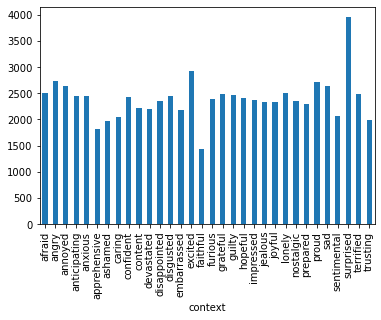

In [11]:
data.groupby(['context']).size().plot.bar()

In [12]:
data.to_csv(r'origin.csv',index=False)

### 合併情緒
開心興奮 excited, surprised, joyful  
害怕擔憂 afraid, terrified, anxious, apprehensive  
噁心尷尬 disgusted, embarrassed, guilty, ashamed  
生氣憤怒 angry, annoyed, jealous, furious  
信任體貼 faithful, trusting, grateful, caring, hopeful  
難過失望 sad ,disappointed, devastated, lonely, nostalgic, sentimental  
驕傲滿足 proud, impressed, content  
自信期待 anticipating, prepared, confident  


In [20]:
def flatten(seq):
    l = []
    for elt in seq:
        t = type(elt)
        if t is tuple or t is list:
            for elt2 in flatten(elt):
                l.append(elt2)
        else:
            l.append(elt)
    return l

In [21]:
excited,afraid, disgusted ,angry, faithful, sad, proud, confident=([],)*8

In [22]:
ex = ["excited", "surprised", "joyful"]
af = ["afraid", "terrified", "anxious", "apprehensive"]
dg = ["disgusted", "embarrassed", "guilty", "ashamed"]
ag = ["angry", "annoyed", "jealous", "furious"]
ff = ["faithful", "trusting", "grateful", "caring", "hopeful"]
sd = ["sad" ,"disappointed", "devastated", "lonely", "nostalgic", "sentimental"]
pr = ["proud", "impressed", "content"]
cf = ["anticipating", "prepared", "confident" ]

In [23]:
def conbined_emo(data, E, emostr, emoarr):
    E=[]
    for emo in emoarr:
        E.append(list(data.loc[data['context']==emo].index))
        
    E = flatten(E)
    
    for i in E:
        if i %1000==0:
            print(i)
        data['context'][i]=emostr
    
    return E


In [69]:
excited = conbined_emo(excited, 'excited', ex)
afraid = conbined_emo(afraid, 'afraid', af)
disgusted = conbined_emo(disgusted, 'disgusted', dg)
angry = conbined_emo(angry, 'angry', ag)
faithful = conbined_emo(faithful, 'faithful', ff)
sad = conbined_emo(sad, 'sad', sd)
proud = conbined_emo(proud, 'proud', pr)
confident =conbined_emo(confident, 'confident', cf)

In [75]:
data.to_csv('data_8cag.csv',index=False)

### val set

In [ ]:
val = pd.read_csv('valid.csv' ,error_bad_lines=False)

<AxesSubplot:xlabel='context'>

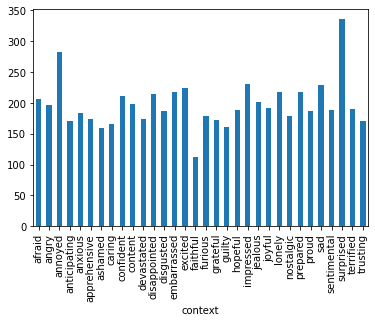

In [11]:
val.groupby(['context']).size().plot.bar()

In [9]:
val = val.drop(["conv_id","prompt", "utterance_idx", "speaker_idx","selfeval","tags"], axis=1)
val

,context,prompt,utterance
0,terrified,Today_comma_as i was leaving for work in the m...,Today_comma_as i was leaving for work in the m...
1,terrified,Today_comma_as i was leaving for work in the m...,Yeah_comma_i'm doing alright now_comma_ but wi...
2,terrified,Today_comma_as i was leaving for work in the m...,The car was badly damaged_comma_i veered outsi...
3,surprised,I was walking through my hallway a few week ag...,A few weeks ago_comma_ I was walking through m...
4,surprised,I was walking through my hallway a few week ag...,I may have let out a scream that will have him...
...,...,...,...
6313,prepared,When I went into labor with my son_comma_ it w...,In the end_comma_ yes--growing too big is actu...
6314,prepared,One time I studied all night for my final exam!,One time I studied all night for my final exam!
6315,prepared,One time I studied all night for my final exam!,It was for Organic Chemistry
6316,furious,One of my coworkers has been arguing with his ...,One of my coworkers has been arguing with his ...


In [24]:
excited,afraid, disgusted ,angry, faithful, sad, proud, confident=([],)*8

In [25]:
excited = conbined_emo(val, excited, 'excited', ex)
afraid = conbined_emo(val, afraid, 'afraid', af)
disgusted = conbined_emo(val, disgusted, 'disgusted', dg)
angry = conbined_emo(val, angry, 'angry', ag)
faithful = conbined_emo(val, faithful, 'faithful', ff)
sad = conbined_emo(val, sad, 'sad', sd)
proud = conbined_emo(val, proud, 'proud', pr)
confident =conbined_emo(val, confident, 'confident', cf)

0
2000
6000
5000
4000
1000
3000


## 確認各情緒數量

In [27]:
print(len(excited))
print(len(afraid))
print(len(disgusted))
print(len(angry))
print(len(faithful))
print(len(sad))
print(len(proud))
print(len(confident))

753
754
725
859
807
1203
617
600


In [28]:
val['context'].unique()

array(['afraid', 'excited', 'disgusted', 'faithful', 'sad', 'proud',
       'confident', 'angry'], dtype=object)

In [30]:
val.to_csv('8cag_valid.csv',index = False)

In [31]:
pd.read_csv('8cag_valid.csv')

,context,utterance
0,afraid,Today_comma_as i was leaving for work in the m...
1,afraid,Yeah_comma_i'm doing alright now_comma_ but wi...
2,afraid,The car was badly damaged_comma_i veered outsi...
3,excited,A few weeks ago_comma_ I was walking through m...
4,excited,I may have let out a scream that will have him...
...,...,...
6313,confident,In the end_comma_ yes--growing too big is actu...
6314,confident,One time I studied all night for my final exam!
6315,confident,It was for Organic Chemistry
6316,angry,One of my coworkers has been arguing with his ...


### Test set

In [33]:
test = pd.read_csv('test.csv', error_bad_lines=False)

b'Skipping line 3: expected 8 fields, saw 9\nSkipping line 5: expected 8 fields, saw 9\nSkipping line 8: expected 8 fields, saw 9\nSkipping line 10: expected 8 fields, saw 9\nSkipping line 12: expected 8 fields, saw 9\nSkipping line 14: expected 8 fields, saw 9\nSkipping line 16: expected 8 fields, saw 9\nSkipping line 18: expected 8 fields, saw 9\nSkipping line 20: expected 8 fields, saw 9\nSkipping line 22: expected 8 fields, saw 9\nSkipping line 25: expected 8 fields, saw 9\nSkipping line 27: expected 8 fields, saw 9\nSkipping line 30: expected 8 fields, saw 9\nSkipping line 32: expected 8 fields, saw 9\nSkipping line 35: expected 8 fields, saw 9\nSkipping line 37: expected 8 fields, saw 9\nSkipping line 39: expected 8 fields, saw 9\nSkipping line 41: expected 8 fields, saw 9\nSkipping line 43: expected 8 fields, saw 9\nSkipping line 45: expected 8 fields, saw 9\nSkipping line 48: expected 8 fields, saw 9\nSkipping line 50: expected 8 fields, saw 9\nSkipping line 53: expected 8 fiel

<AxesSubplot:xlabel='context'>

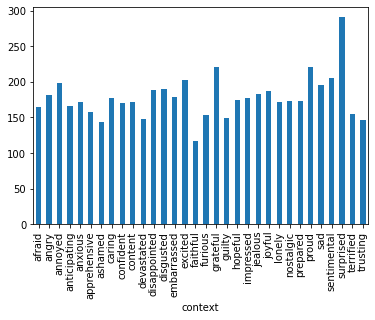

In [34]:
test.groupby(['context']).size().plot.bar()

In [35]:
test = test.drop(["conv_id","prompt", "utterance_idx", "speaker_idx","selfeval","tags"], axis=1)
test

,context,utterance
0,guilty,Yeah about 10 years ago I had a horrifying exp...
1,guilty,No I wasn't hit. It turned out they were drunk...
2,guilty,I don't know I was new to driving and hadn't e...
3,caring,Well_comma_ can you tell me about your experie...
4,caring,Oh my goodness_comma_ that's very scary! I hop...
...,...,...
5696,grateful,Glad you think so as well!
5697,disgusted,I saw a huge cockroach outside my house today!
5698,disgusted,Not yet since it's the weekend. We live in Tex...
5699,anxious,I have a big test on Monday_comma_ I am so ner...


In [36]:
excited,afraid, disgusted ,angry, faithful, sad, proud, confident=([],)*8

In [37]:
excited = conbined_emo(test, excited, 'excited', ex)
afraid = conbined_emo(test, afraid, 'afraid', af)
disgusted = conbined_emo(test, disgusted, 'disgusted', dg)
angry = conbined_emo(test, angry, 'angry', ag)
faithful = conbined_emo(test, faithful, 'faithful', ff)
sad = conbined_emo(test, sad, 'sad', sd)
proud = conbined_emo(test, proud, 'proud', pr)
confident =conbined_emo(test, confident, 'confident', cf)

0
3000
4000
5000
1000
2000


## 確認各情緒數量

In [38]:
print(len(excited))
print(len(afraid))
print(len(disgusted))
print(len(angry))
print(len(faithful))
print(len(sad))
print(len(proud))
print(len(confident))

680
648
661
715
837
1080
571
509


In [40]:
test['context'].unique()

array(['disgusted', 'faithful', 'sad', 'excited', 'angry', 'proud',
       'afraid', 'confident'], dtype=object)

In [41]:
test.to_csv('8cag_test.csv',index = False)

In [42]:
pd.read_csv('8cag_test.csv')

,context,utterance
0,disgusted,Yeah about 10 years ago I had a horrifying exp...
1,disgusted,No I wasn't hit. It turned out they were drunk...
2,disgusted,I don't know I was new to driving and hadn't e...
3,faithful,Well_comma_ can you tell me about your experie...
4,faithful,Oh my goodness_comma_ that's very scary! I hop...
...,...,...
5696,faithful,Glad you think so as well!
5697,disgusted,I saw a huge cockroach outside my house today!
5698,disgusted,Not yet since it's the weekend. We live in Tex...
5699,afraid,I have a big test on Monday_comma_ I am so ner...


In [39]:
import numpy as np
len(data.loc[data['context']=='excited'].index)

2932

In [18]:
data.loc[data['context']=='surprised'].index

Int64Index([  117,   118,   119,   120,   256,   257,   258,   259,   345,
              346,
            ...
            76349, 76402, 76403, 76404, 76405, 76406, 76618, 76619, 76620,
            76621],
           dtype='int64', length=3955)

In [ ]:
data['context']['']

In [ ]:
for i in df.loc[data['context']=='surprised'].index:
    data['context'][i]='excited'